<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
!wget "https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip"

The name is too long, 530 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP+RYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV.
--2020-03-02 04:35:00--  https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip
Resolving storage.googleapis.com (storage.googl

In [4]:
!unzip arch.zip

Archive:  arch.zip
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0a5ad922e-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0d3176320-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1b0fea37a-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1dc80f91c-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_02a62b902-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_05eee5bea-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_13074c5c4-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_16519402a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_236293c2a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar

In [0]:
from fastai.vision import *

In [0]:
path = Path('data/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

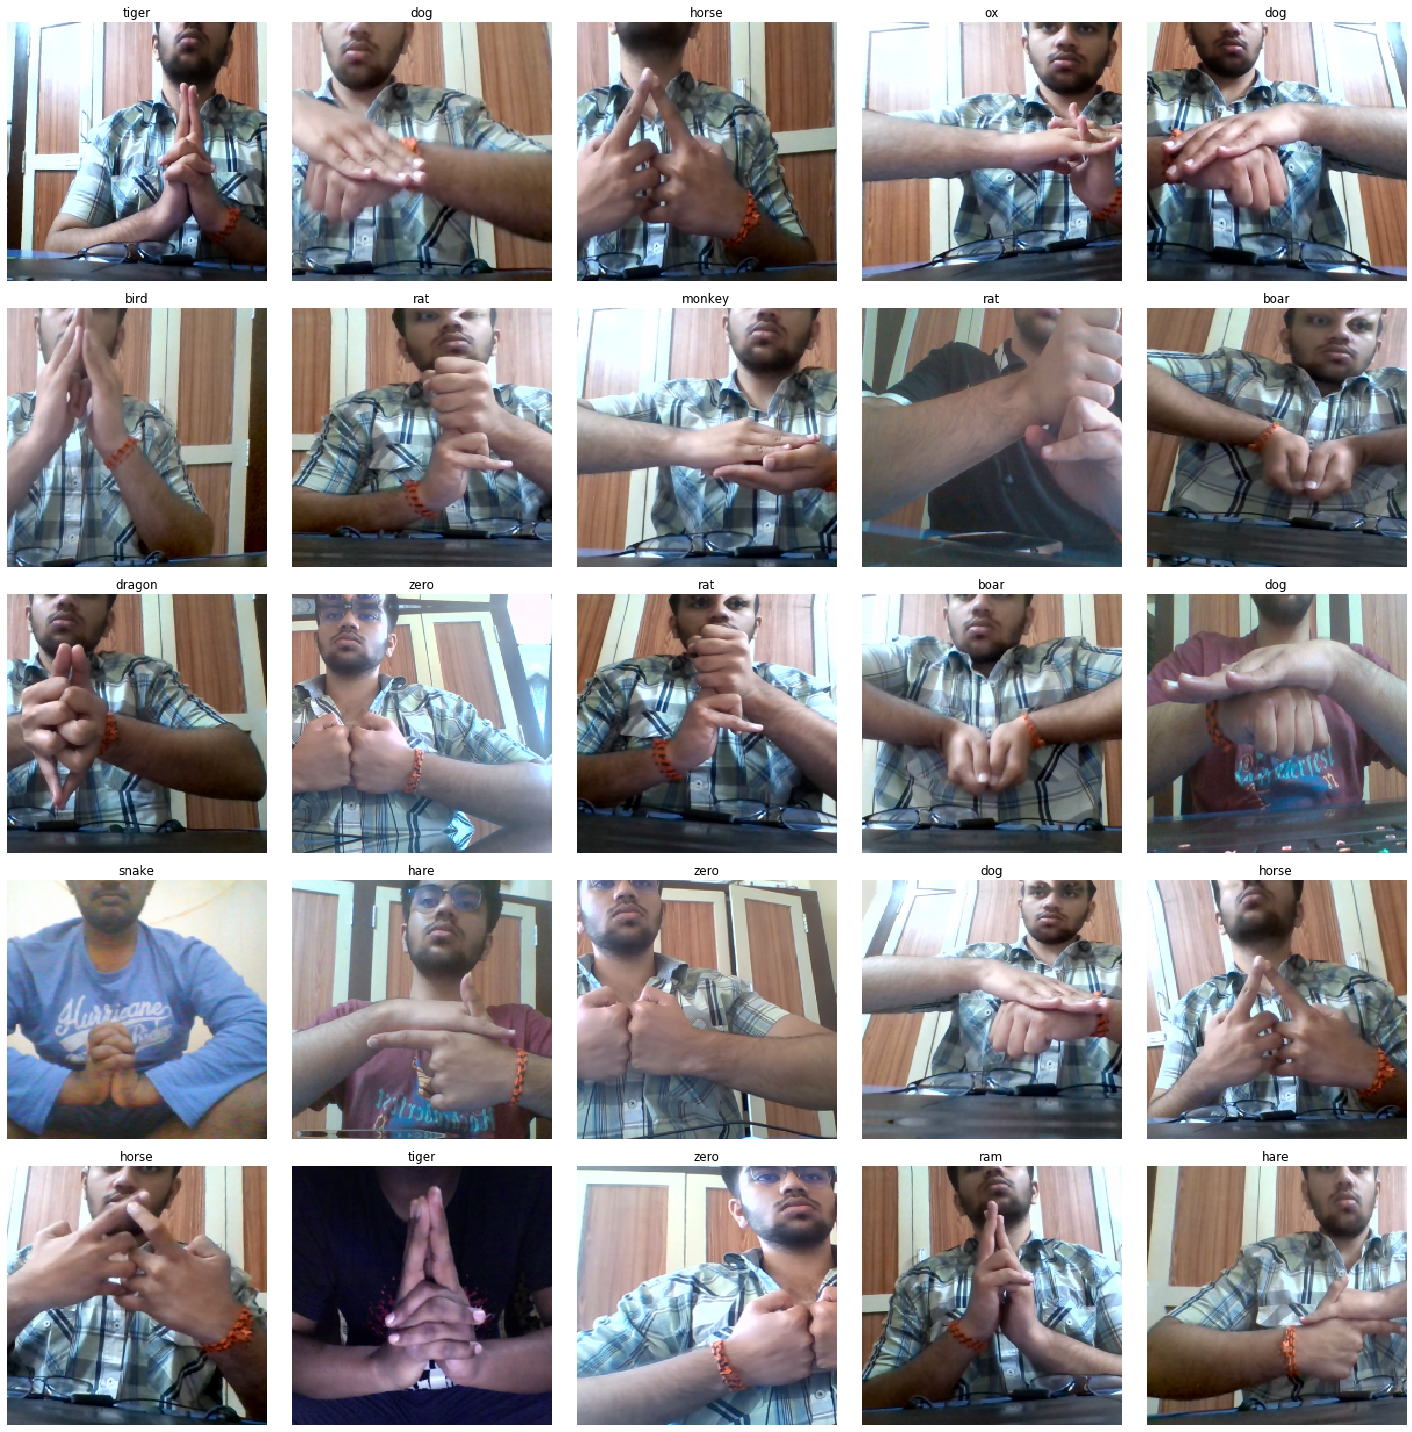

In [7]:
data.show_batch()

In [8]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


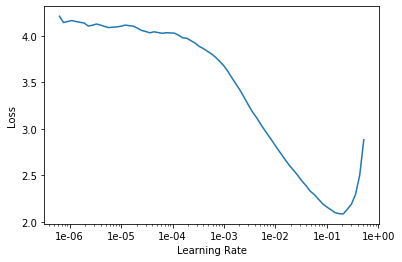

In [0]:
learner.lr_find()

learner.recorder.plot()

In [9]:
learner.fit_one_cycle(5, 2e-3)

In [26]:
learner.unfreeze()
learner.fit_one_cycle(3, 2e-3)

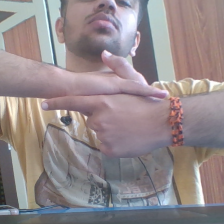

In [10]:
learner.data.train_ds[1][0]

In [11]:
learner.data.train_ds[1][1]

Category hare

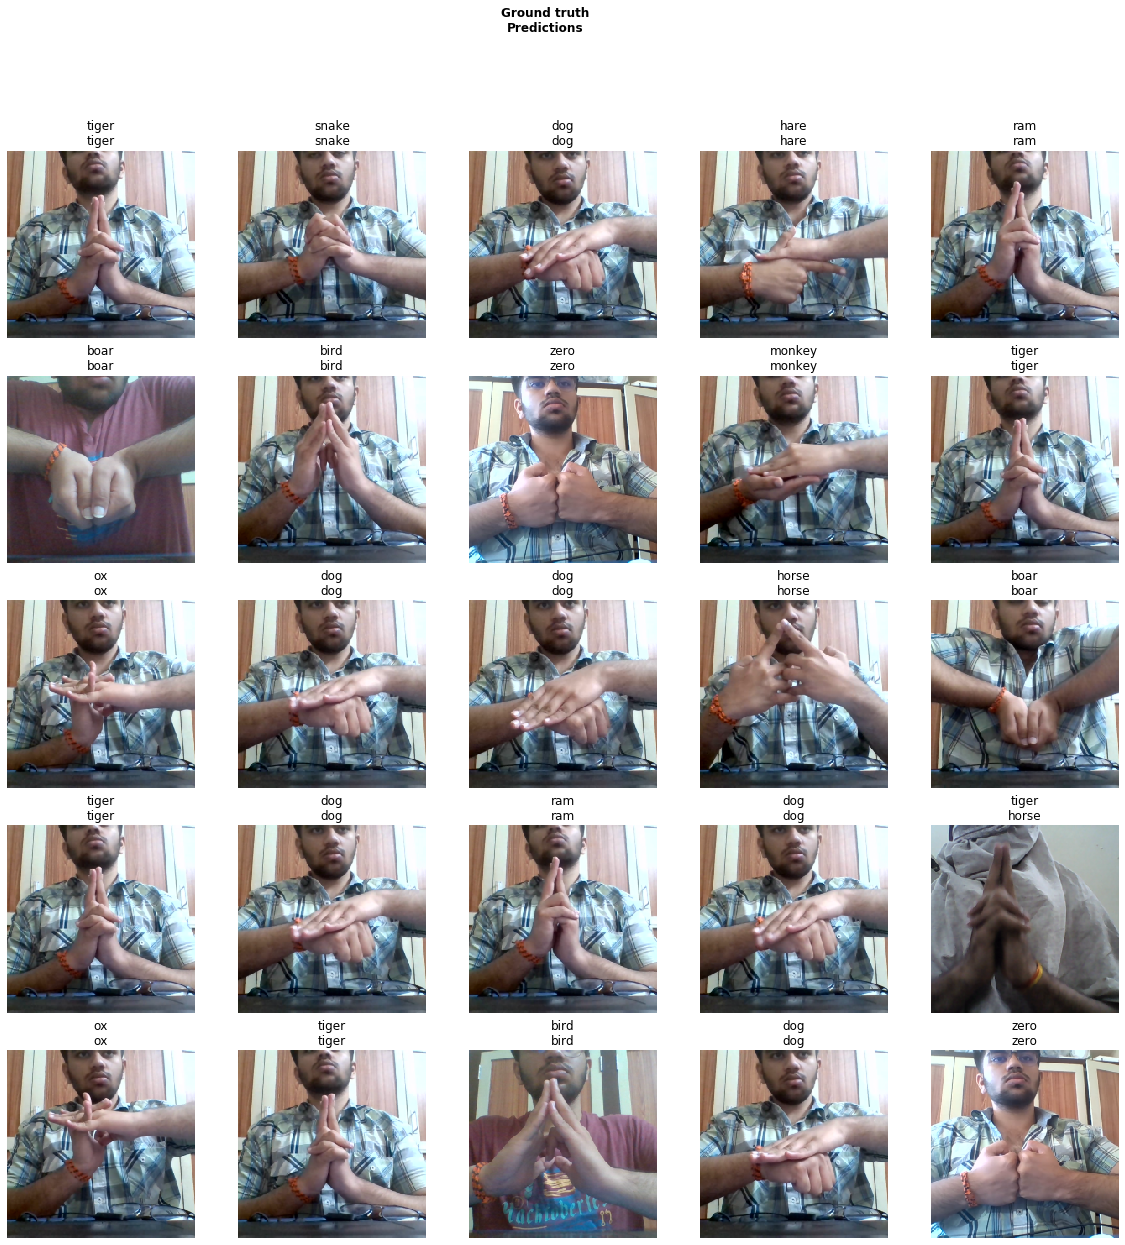

In [12]:
learner.show_results()

In [13]:
img = learner.data.train_ds[1][0]
learner.predict(img)

(Category ox,
 tensor(7),
 tensor([5.6902e-03, 3.8521e-03, 3.1184e-02, 1.7789e-04, 2.2453e-01, 1.4873e-03,
         1.6067e-03, 7.2531e-01, 7.2644e-04, 1.4597e-04, 2.0270e-03, 2.9984e-04,
         2.9676e-03]))

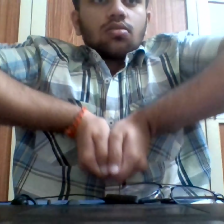

In [14]:
learner.data.valid_ds[100][0]

In [15]:
learner.data.valid_ds[100][1]

Category boar

In [16]:
img = learner.data.valid_ds[100][0]
learner.predict(img)

(Category boar,
 tensor(1),
 tensor([2.9276e-06, 9.9999e-01, 5.0624e-07, 2.7975e-07, 3.0187e-06, 2.2350e-08,
         1.8727e-06, 1.9691e-06, 2.8885e-08, 8.2454e-08, 1.0915e-07, 1.8739e-08,
         2.5303e-07]))

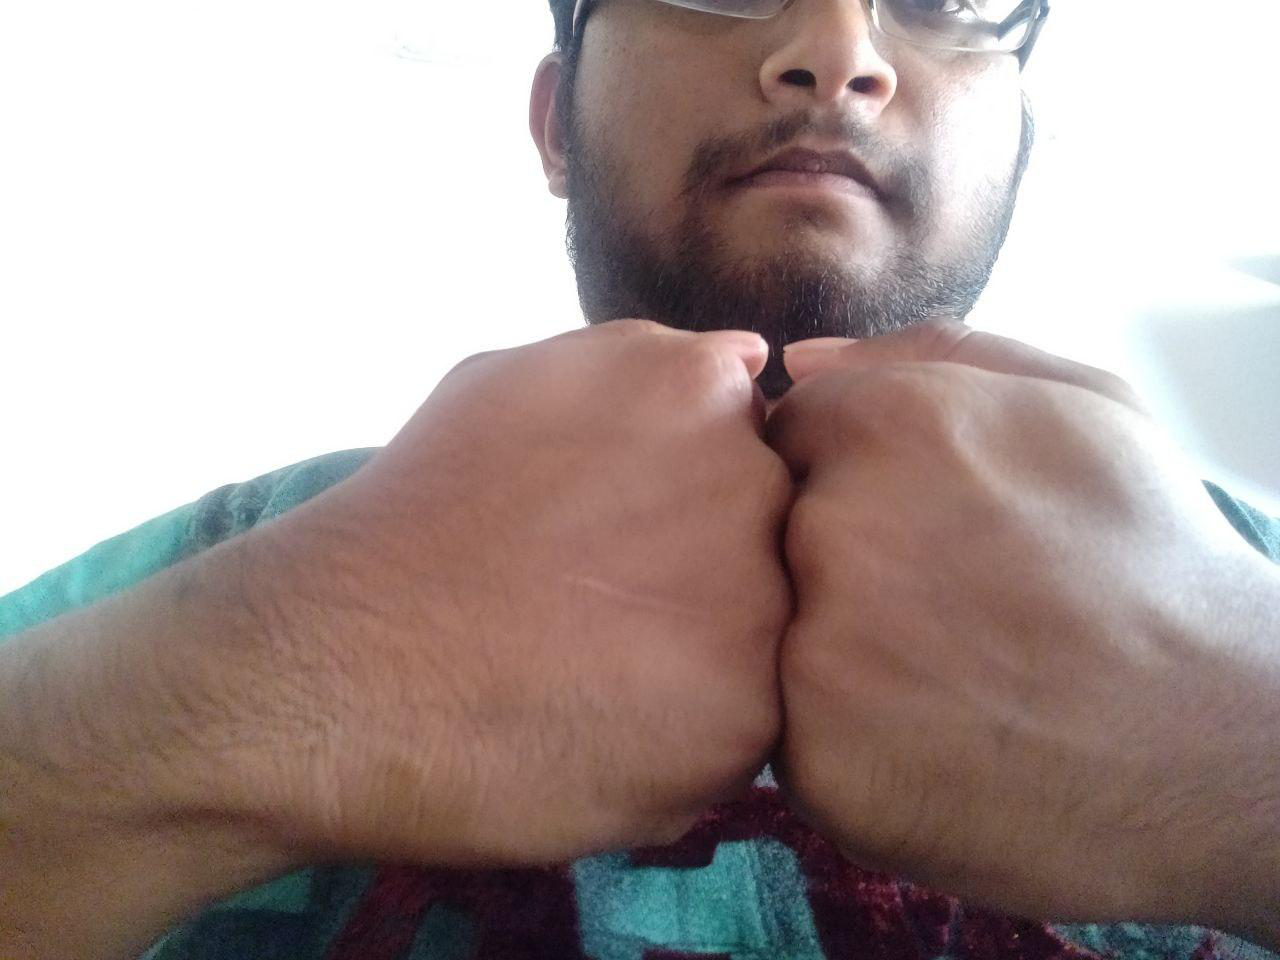

In [24]:
img = open_image('test.jpg')
img

In [25]:
%%time
learner.predict(img)

CPU times: user 36 ms, sys: 1.16 ms, total: 37.1 ms
Wall time: 39.4 ms


(Category zero,
 tensor(12),
 tensor([3.8285e-03, 3.9503e-03, 1.9784e-03, 4.1015e-04, 4.5158e-03, 2.9890e-03,
         4.6468e-02, 8.4922e-04, 3.1962e-02, 2.3304e-03, 1.2745e-04, 2.0512e-03,
         8.9854e-01]))

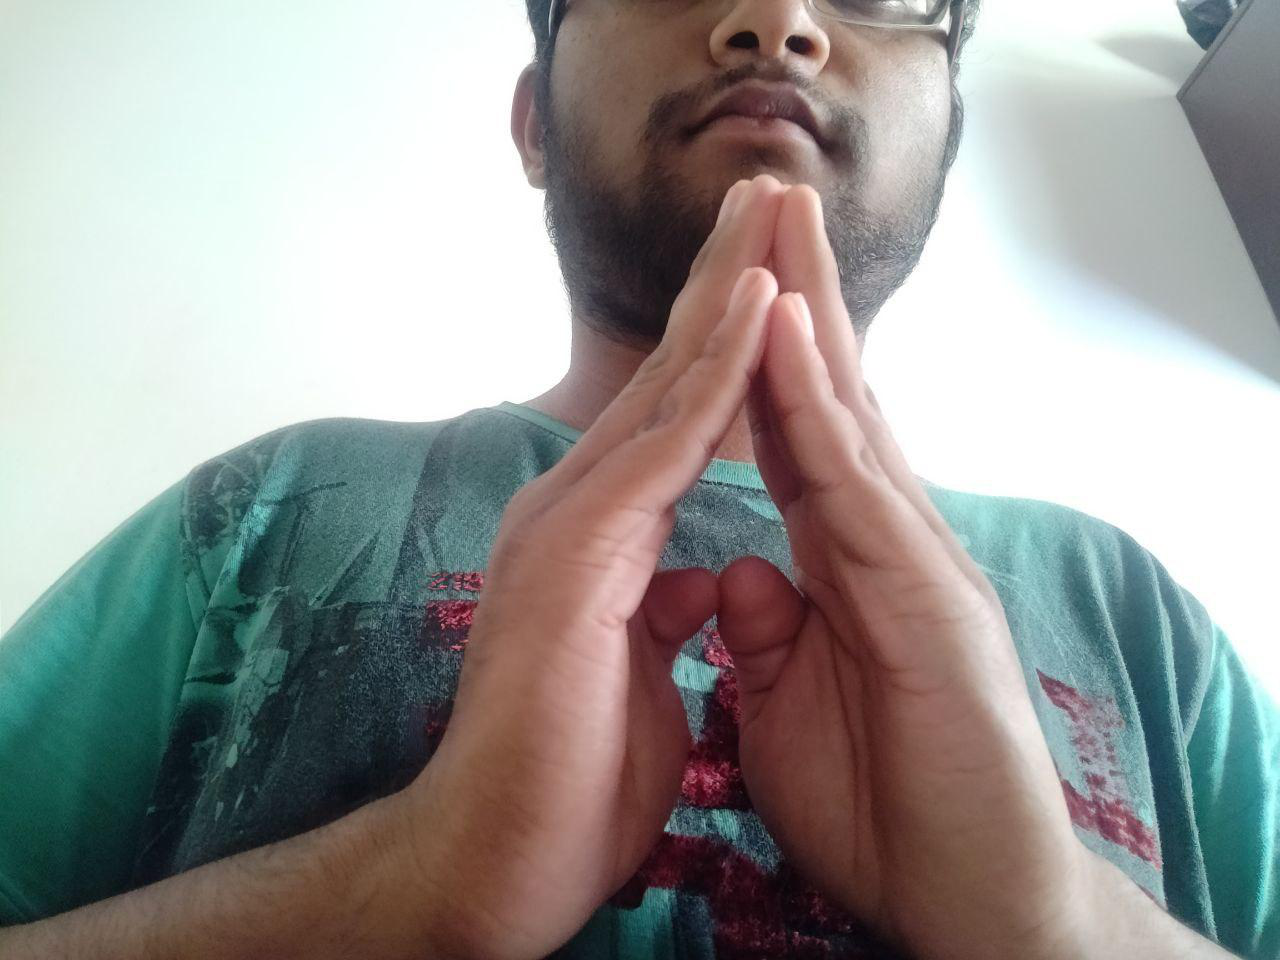

In [20]:
img = open_image('test2.jpg')
img

In [21]:
learner.predict(img)


(Category bird,
 tensor(0),
 tensor([9.9715e-01, 7.6122e-05, 1.0245e-06, 1.4183e-06, 4.1973e-07, 3.9753e-05,
         7.5947e-05, 1.5544e-05, 4.2340e-05, 2.0335e-03, 9.4974e-07, 9.1951e-05,
         4.6905e-04]))

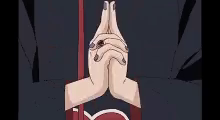

In [36]:
img = open_image('test3.png')
img

In [37]:
learner.predict(img)

(Category ram,
 tensor(8),
 tensor([1.8747e-05, 4.3145e-06, 1.0187e-08, 1.0596e-04, 1.2445e-06, 6.1670e-06,
         2.9052e-07, 1.8986e-06, 9.0636e-01, 8.9719e-05, 3.8265e-05, 9.3368e-02,
         2.1606e-06]))

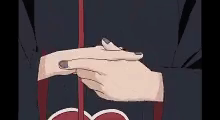

In [40]:
img = open_image('test4.png')
img

In [41]:
learner.predict(img)

(Category hare,
 tensor(4),
 tensor([9.5523e-10, 1.4835e-07, 1.7260e-09, 2.5551e-07, 9.9999e-01, 3.2868e-08,
         5.4165e-06, 7.8580e-09, 1.2372e-08, 6.9326e-08, 1.1541e-09, 2.5040e-09,
         1.3740e-08]))